In [199]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [200]:
%%capture
import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import numpy as np
import h5py
from saliency import *
import matplotlib.pyplot as plt

In [201]:
from tensorflow.keras.models import load_model
from utils import *
from BilinearInterpolate3D import BilinearInterpolate3D
from OrthogonalConv import NetXCycle

In [202]:
BATCH_SIZE = 64

## Load CIFAR10 model

In [203]:
%%capture
cifar_model_path = 'model_val_accuracy.h5'
cifar_dataset_path = 'test_00001.h5'
cifar_model = load_model(cifar_model_path, custom_objects={'BilinearInterpolate3D':BilinearInterpolate3D})

In [204]:
# Compiling the model
opt_rms = RMSprop(lr=0.001,decay=1e-6)
cifar_model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

cifar_model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 80)        2240      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 80)        320       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 80)        0         
_________________________________________________________________
bilinear_interpolate3d (Bili (None, 75, 75, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 75)        50700     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 75, 75, 75)        300 

In [205]:
# Load dataset
x_test, y_test = read_h5_dataset(cifar_dataset_path)

In [157]:
# Evaluating 
scores = cifar_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

10000/10000 [==============================] - 9s 941us/sample - loss: 0.4911 - acc: 0.8815


## Load PATHFINDER model

In [7]:
# Specify the model directory path - no trailing `/`
pathfinder_model_dir = 'model_kernel20_path9'

In [8]:
!sh untar.sh $pathfinder_model_dir

!ls model_kernel20_path9/

model_kernel20_path9.h5
model.tar.gz.partaa  model.tar.gz.partab  model_kernel20_path9.h5


In [9]:
%%capture
pathfinder_model_path = pathfinder_model_dir + '/' + pathfinder_model_dir + '.h5'

pathfinder_model = load_model(pathfinder_model_path, custom_objects={'BilinearInterpolate3D':BilinearInterpolate3D,
                                                                        'NetXCycle': NetXCycle})

!rm $pathfinder_model_path

In [10]:
pathfinder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     51328     
_________________________________________________________________
batch_normalization_v1 (Batc (None, 128, 128, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128)     0         
_________________________________________________________________
net_x_cycle (NetXCycle)      (None, 128, 128, 128)     19662720  
_________________________________________________________________
global_max_pooling2d (Global (None, 128)               0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0     

# Saliency:

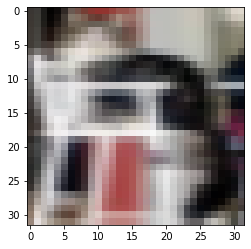

In [206]:
image_index = np.random.randint(0, x_test.shape[0]-1)
image = x_test[image_index]
plt.imshow((image * NORMALIZING_CONST + CENTRALIZING_CONST)/QUANTIZATION_SIZE)


In [228]:
no_of_nodes = 3
layer_list = [2,70]
saliency = get_saliency_maps_and_fitted_ellipses(cifar_model, layer_list, no_of_nodes, image)

number of constant pics: 0


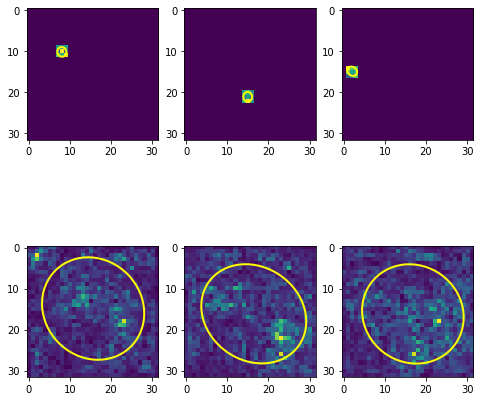

In [229]:
print_images(*saliency)
            

In [216]:
layer = 42
no_of_images = 2
no_of_nodes = 2
image_indices = np.random.randint(0, x_test.shape[0]-1, size = no_of_images)

In [217]:
sqrt_traces = get_saliency_stats(cifar_model, layer, no_of_nodes, x_test[image_indices])
print(np.mean(sqrt_traces))
print(np.std(sqrt_traces))

number of constant pics: 0
12.510724565895698
0.904264886442838


In [227]:
np.full((2,2), np.nan)

array([[nan, nan],
       [nan, nan]])